In [1]:
import pandas as pd

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data_ML.csv', index_col=0)

In [3]:
labels = data['labels'].to_list()

In [4]:
del data['smiles']
del data['labels']

In [5]:
data

,NumHAcceptors,NumHDonors,NumHeteroatoms,NumAromaticRings,NumAliphaticHeterocycles,MW,LogP,TPSA,0,1,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,3.246157,3.251687,1.416232,-1.484853,-0.003943,1.082791,-3.380094,4.384257,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
1,4.370793,4.182829,5.421961,-1.484853,-0.003943,0.665024,-4.795324,7.217683,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
2,4.370793,2.320546,2.751475,-1.484853,-0.003943,4.121697,-0.551631,5.097073,-0.028262,1.715921,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
3,-3.501661,-2.335161,-3.034579,-3.935595,-1.239092,-4.682147,-4.330034,-2.385949,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
4,-1.252388,0.458263,0.971151,-0.259483,-1.239092,0.178194,1.436357,-0.026053,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,9.642354,-0.105012,-0.043193,-0.099704,-0.083456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,2.683839,3.251687,4.531799,-0.259483,-0.003943,4.856752,1.716556,5.754431,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
3755,6.057748,2.320546,7.202286,0.965888,1.231206,6.258547,-1.623466,8.473450,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
3756,5.495430,2.320546,6.757204,0.965888,1.231206,5.752152,-1.637876,8.115491,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456
3757,4.933111,2.320546,6.312123,0.965888,1.231206,5.245758,-1.652287,7.757531,-0.028262,-0.582777,...,-0.101056,-0.073137,-0.028262,-0.076727,-0.09411,-0.103709,-0.105012,-0.043193,-0.099704,-0.083456


In [6]:
columns = data.columns
X = torch.tensor(data[columns].values)
print(X.shape)

torch.Size([3759, 2056])


In [7]:
y = labels

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=73)

In [9]:
X_train, X_test, y_train, y_test = torch.tensor(X_train, dtype=torch.float32),\
                                   torch.tensor(X_test, dtype=torch.float32),\
                                   torch.tensor(y_train, dtype=torch.float32),\
                                   torch.tensor(y_test, dtype=torch.float32)

/var/folders/7f/r6y7pww15x53z42m3h5vt12r0000gn/T/ipykernel_51951/798125008.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train, X_test, y_train, y_test = torch.tensor(X_train, dtype=torch.float32),\
/var/folders/7f/r6y7pww15x53z42m3h5vt12r0000gn/T/ipykernel_51951/798125008.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X_test, dtype=torch.float32),\


In [10]:
X_train.shape

torch.Size([3007, 2056])

In [11]:
n_input, n_hidden, n_out, learning_rate = 2056, 15, 1, 0.01

In [12]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=2056, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [13]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
losses = []
for epoch in range(2000):
    pred_y = model(X_train)
    loss = loss_function(pred_y, y_train)
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()

/Users/alisagorislav/opt/anaconda3/envs/ptenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([3007])) that is different to the input size (torch.Size([3007, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


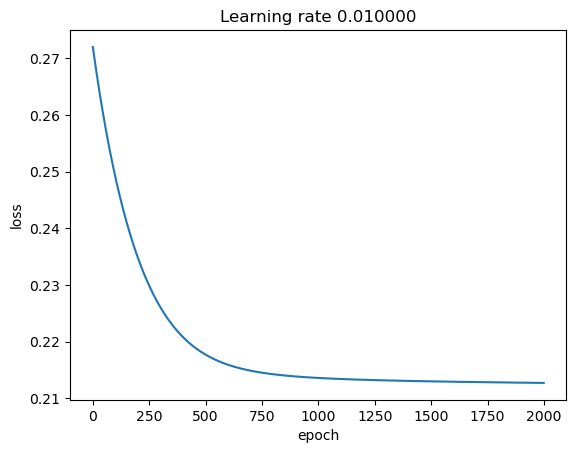

In [15]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()